## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import wrangle
import json

## Acquiring the data

In [2]:
df = pd.read_csv('311_service_calls.csv')

## Preparing the data

In [3]:
df = wrangle.clean_311(df)

In [4]:
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,zipcode
1207,1012676462,2016-03-25,2020-11-05,2020-10-05,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1136 KAYTON AVE, San Antonio, 78210",3,2143337.0,13692343.0,1655.0,1686,31.0,Early Response,78210
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1018 KING AVE, San Antonio, 78211",4,2108015.0,13680344.0,804.0,933,129.0,Very Early Response,78211


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428871 entries, 1207 to 495432
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   428871 non-null  int64         
 1   open_date                 428871 non-null  datetime64[ns]
 2   due_date                  428871 non-null  datetime64[ns]
 3   closed_date               428871 non-null  datetime64[ns]
 4   is_late                   428871 non-null  object        
 5   dept                      428871 non-null  object        
 6   call_reason               428871 non-null  object        
 7   case_type                 428871 non-null  object        
 8   case_status               428871 non-null  object        
 9   source_id                 428871 non-null  object        
 10  address                   428871 non-null  object        
 11  council_district          428871 non-null  int64         
 12 

In [6]:
# This dataset is very thorough with nulls only around 10% for the dept column (nulls in CLOSEDDATETIME is just 
# indicative of an open case)

df.isna().sum()

case_id                         0
open_date                       0
due_date                        0
closed_date                     0
is_late                         0
dept                            0
call_reason                     0
case_type                       0
case_status                     0
source_id                       0
address                         0
council_district                0
longitude                       0
latitude                        0
days_open                       0
resolution_days_due             0
days_before_or_after_due        0
level_of_delay                  0
zipcode                     72155
dtype: int64

In [7]:
# Roughly 1/5 of our cases came back late

df.groupby('is_late').case_id.count()

is_late
NO     371324
YES     57547
Name: case_id, dtype: int64

In [8]:
# Note that the CLOSEDDATETIME column has 54053 nulls which matches, probably safe to assume these cases are indeed
# still open

df.groupby('case_status').case_id.count()

case_status
Closed    428871
Name: case_id, dtype: int64

In [9]:
df.groupby('council_district').case_id.count()

council_district
0      2355
1     56484
2     56179
3     54991
4     40941
5     58460
6     36320
7     39597
8     24185
9     24009
10    35350
Name: case_id, dtype: int64

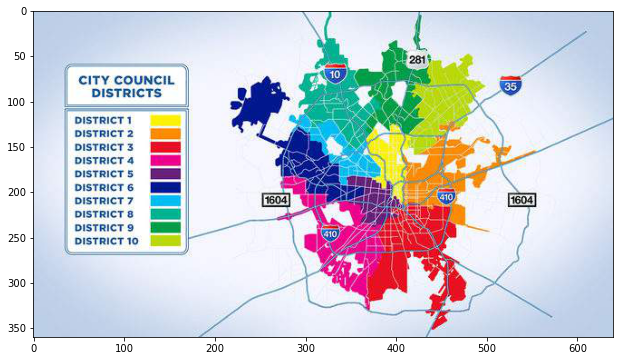

In [10]:
plt.subplots(figsize=(16, 6))
img = mpimg.imread('council_map.jpg')
imgplot = plt.imshow(img)
plt.show()

<AxesSubplot:xlabel='dept', ylabel='count'>

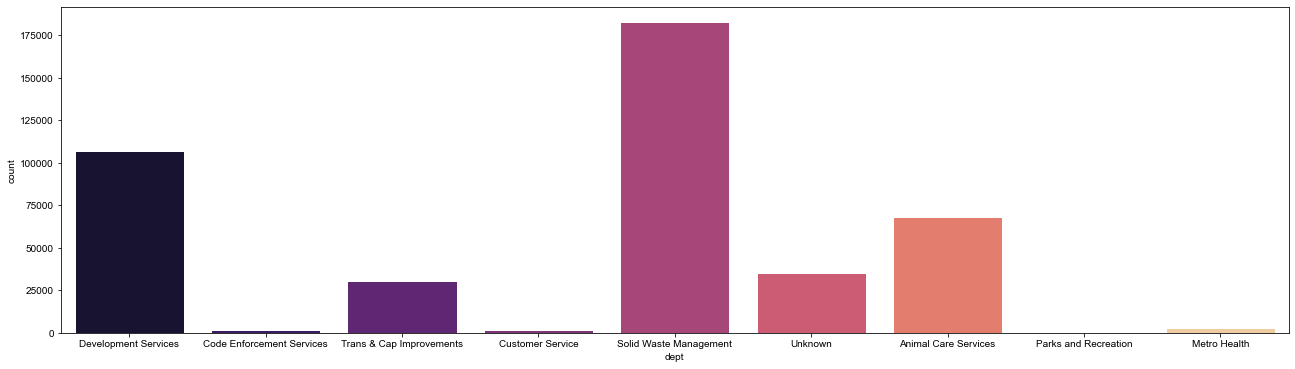

In [11]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'dept', palette = "magma")

<AxesSubplot:xlabel='call_reason', ylabel='count'>

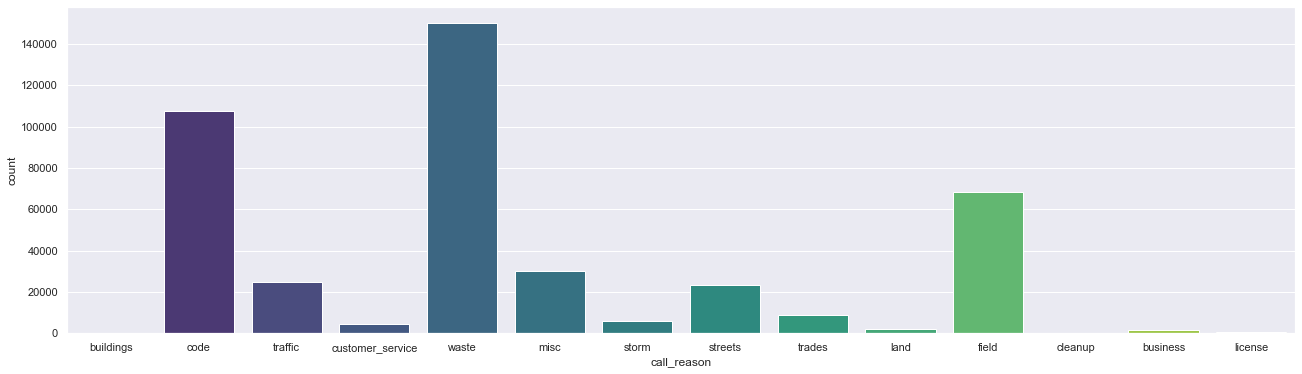

In [12]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
#signif_reasons = df.groupby("call_reason").filter(lambda g: (g.REASONNAME.size >= 2000))
sns.countplot(data = df, x = 'call_reason', palette = "viridis")

In [13]:
with open('Bexar_County_ZIP_Code_Areas.geojson', 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

In [15]:
geozips = []
for i in range (len(tmp['features'])):
    if tmp['features'][i]['properties']['ZIP'] in list(df['zipcode'].unique()):
        geozips.append(tmp['features'][i])

In [18]:
new_json = dict.fromkeys(['type', 'features'])
new_json['features'] = geozips
new_json['type'] = 'FeatureCollection'

In [19]:
open("updated-file.json", "w").write(json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ':')))

11319165